In [8]:
import os
import cv2
import numpy as np
from PIL import Image
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt

base_dir = 'dataset'  # Diretório contendo as pastas e subpastas com imagens
augmented_images = 'augmented_dataset' # Diretório para salvar as imagens aumentadas
transformed_images = 'transformed_dataset' # Diretório para salvar as imagens transformadas
num_augmented_copies = 3  # Quantidade de cópias aumentadas por imagem

2.1.1


In [14]:
def augment_image(image):
    """
    Aplica data augmentation a uma imagem usando a biblioteca imgaug.

    Args:
        image (numpy array): Imagem em formato de array NumPy.

    Returns:
        numpy array: Imagem aumentada.
    """
    # Definir as transformações de augmentação
    augmentation = iaa.Sequential([
        iaa.Fliplr(0.5),  # Flip horizontal com probabilidade de 50%
        iaa.Flipud(0.2),  # Flip vertical com probabilidade de 20%
        iaa.Affine(rotate=(-25, 25)),  # Rotacionar a imagem entre -25 e 25 graus
        iaa.Multiply((0.8, 1.2)),  # Ajustar o brilho (entre 80% e 120% do brilho original)
        iaa.Affine(scale=(0.8, 1.2)),  # Zoom in/out (entre 80% e 120% do tamanho original)
        iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Adicionar ruído gaussiano
    ])
    
    # Aplicar as transformações à imagem
    augmented_image = augmentation.augment_image(image)
    
    return augmented_image

def apply_augmentation_to_directory(input_dir, output_dir, num_augmented_copies=5):
    """
    Aplica data augmentation a todas as imagens em todas as pastas e subpastas do diretório.

    Args:
        input_dir (str): Caminho para o diretório base que contém as subpastas com as imagens.
        output_dir (str): Caminho para o diretório onde as imagens aumentadas serão salvas.
        num_augmented_copies (int): Número de cópias aumentadas que deseja criar para cada imagem.
    """
    # Criar a pasta de saída, se não existir
    os.makedirs(output_dir, exist_ok=True)
    
    # Percorre todas as pastas e subpastas do diretório de entrada
    for root, dirs, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path)
                
                # Gerar as cópias aumentadas
                for i in range(num_augmented_copies):
                    augmented_image = augment_image(image)
                    
                    # Gerar caminho da pasta de saída correspondente
                    relative_path = os.path.relpath(root, input_dir)
                    output_folder = os.path.join(output_dir, relative_path)
                    os.makedirs(output_folder, exist_ok=True)

                    # Nomear e salvar a imagem aumentada
                    base_filename = os.path.splitext(filename)[0]
                    output_filename = f'{base_filename}_aug_{i}.jpg'
                    output_path = os.path.join(output_folder, output_filename)
                    cv2.imwrite(output_path, augmented_image)
                    print(f'Imagem aumentada salva: {output_path}')

# Exemplo de uso
input_dir = 'dataset'  # Diretório contendo as pastas e subpastas com imagens
output_dir = 'augmented_images'  # Diretório onde as imagens aumentadas serão salvas
num_augmented_copies = 5  # Quantidade de cópias aumentadas por imagem

apply_augmentation_to_directory(input_dir, output_dir, num_augmented_copies)


Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-B_aug_0.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-B_aug_1.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-B_aug_2.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-B_aug_3.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-B_aug_4.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-W_aug_0.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-W_aug_1.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-W_aug_2.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-W_aug_3.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V1-W_aug_4.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V2-B_aug_0.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V2-B_aug_1.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V2-B_aug_2.jpg
Imagem aumentada salva: augmented_images\corkscrew\0-01-V2-B_aug_3.jpg
Imagem

In [10]:
def apply_log_transform(image, c=1):
    """
    Aplica a transformação logarítmica a uma imagem.
    
    Args:
        image (numpy array): Imagem de entrada em formato de array NumPy.
        c (float): Constante multiplicativa para ajuste de contraste. O valor padrão é 1.
    
    Returns:
        numpy array: Imagem transformada com logaritmo.
    """
    image_log = c * np.log1p(image)
    image_log_normalized = cv2.normalize(image_log, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(image_log_normalized)

def apply_exp_transform(image, c=1):
    """
    Aplica a transformação exponencial a uma imagem.
    
    Args:
        image (numpy array): Imagem de entrada em formato de array NumPy.
        c (float): Constante multiplicativa para ajuste de contraste. O valor padrão é 1.
    
    Returns:
        numpy array: Imagem transformada com exponencial.
    """
    image_exp = c * np.expm1(image / 255.0)  # Normaliza a imagem e aplica exponencial
    image_exp_normalized = cv2.normalize(image_exp, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(image_exp_normalized)

def apply_mean_filter(image, kernel_size=3):
    """
    Aplica o filtro da média usando convolução a uma imagem.
    
    Args:
        image (numpy array): Imagem de entrada em formato de array NumPy.
        kernel_size (int): Tamanho do kernel. O padrão é 3.
    
    Returns:
        numpy array: Imagem filtrada com filtro da média.
    """
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    image_filtered = cv2.filter2D(image, -1, kernel)
    return image_filtered

def process_images_in_directory(input_dir, output_dir):
    """
    Aplica transformações (log, exp, filtro da média) em todas as imagens do diretório e subpastas.
    
    Args:
        input_dir (str): Diretório de entrada com as imagens originais.
        output_dir (str): Diretório de saída para salvar as imagens processadas.
    """
    # Criar o diretório de saída, se não existir
    os.makedirs(output_dir, exist_ok=True)
    
    # Percorre todas as pastas e subpastas do diretório de entrada
    for root, dirs, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.png')):
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype('float32') # Ler em escala de cinza para simplificar

                # Aplicar as transformações
                log_image = apply_log_transform(image)
                exp_image = apply_exp_transform(image)
                mean_filtered_image = apply_mean_filter(image)

                # Gerar caminho da pasta de saída correspondente
                relative_path = os.path.relpath(root, input_dir)
                output_folder = os.path.join(output_dir, relative_path)
                os.makedirs(output_folder, exist_ok=True)

                # Salvar as imagens transformadas na pasta de saída
                base_filename = os.path.splitext(filename)[0]
                cv2.imwrite(os.path.join(output_folder, f'{base_filename}_log.png'), log_image)
                cv2.imwrite(os.path.join(output_folder, f'{base_filename}_exp.png'), exp_image)
                cv2.imwrite(os.path.join(output_folder, f'{base_filename}_mean.png'), mean_filtered_image)

                print(f'Imagens processadas salvas para {filename}')

process_images_in_directory(base_dir, output_dir=transformed_images)


Imagens processadas salvas para 0-01-V1-B.png
Imagens processadas salvas para 0-01-V1-W.png
Imagens processadas salvas para 0-01-V2-B.png
Imagens processadas salvas para 0-01-V2-W.png
Imagens processadas salvas para 1-02-V1-B.png
Imagens processadas salvas para 1-02-V1-W.png
Imagens processadas salvas para 1-02-V2-B.png
Imagens processadas salvas para 1-02-V2-W.png
Imagens processadas salvas para 2-03-V1-B.png
Imagens processadas salvas para 2-03-V1-W.png
Imagens processadas salvas para 2-03-V2-B.png
Imagens processadas salvas para 2-03-V2-W.png
Imagens processadas salvas para 3-04-V1-B.png
Imagens processadas salvas para 3-04-V1-W.png
Imagens processadas salvas para 3-04-V2-B.png
Imagens processadas salvas para 3-04-V2-W.png
Imagens processadas salvas para 4-05-V1-B.png
Imagens processadas salvas para 4-05-V1-W.png
Imagens processadas salvas para 4-05-V2-B.png
Imagens processadas salvas para 4-05-V2-W.png
Imagens processadas salvas para 5-06-V1-B.png
Imagens processadas salvas para 5-

Classe: corkscrew


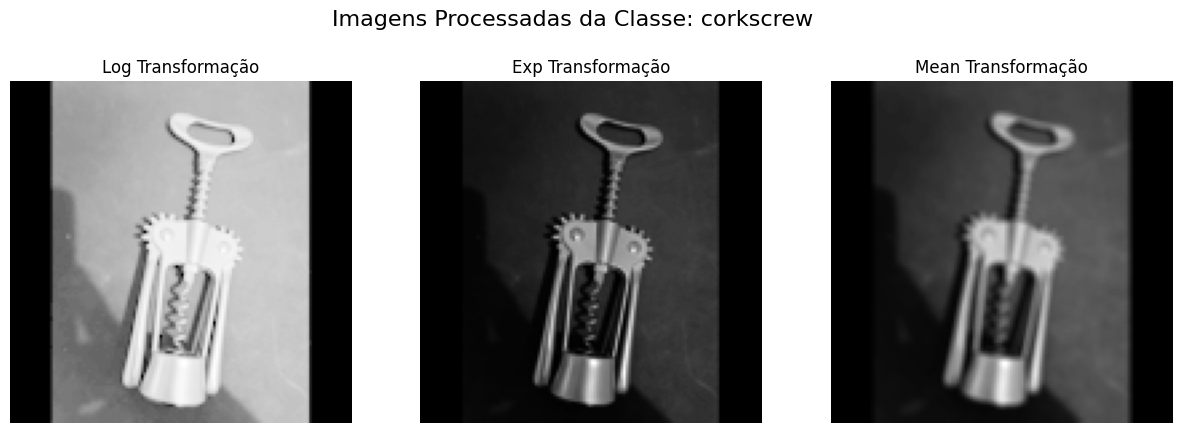

Classe: dinner_plate


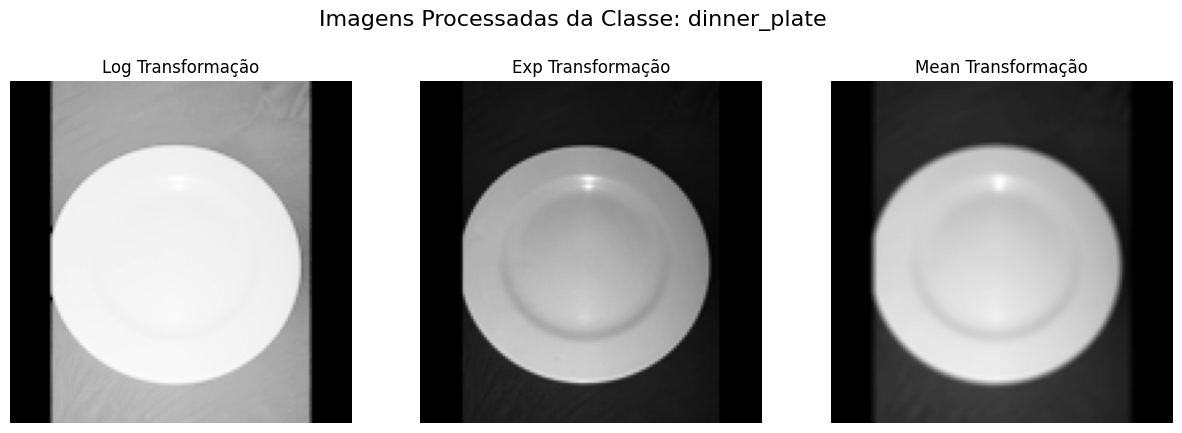

Classe: fork


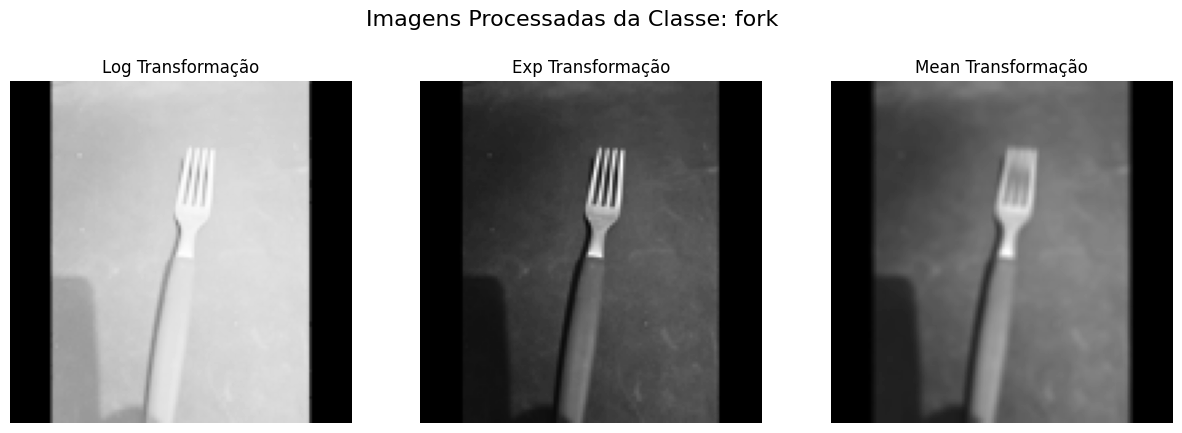

Classe: glass


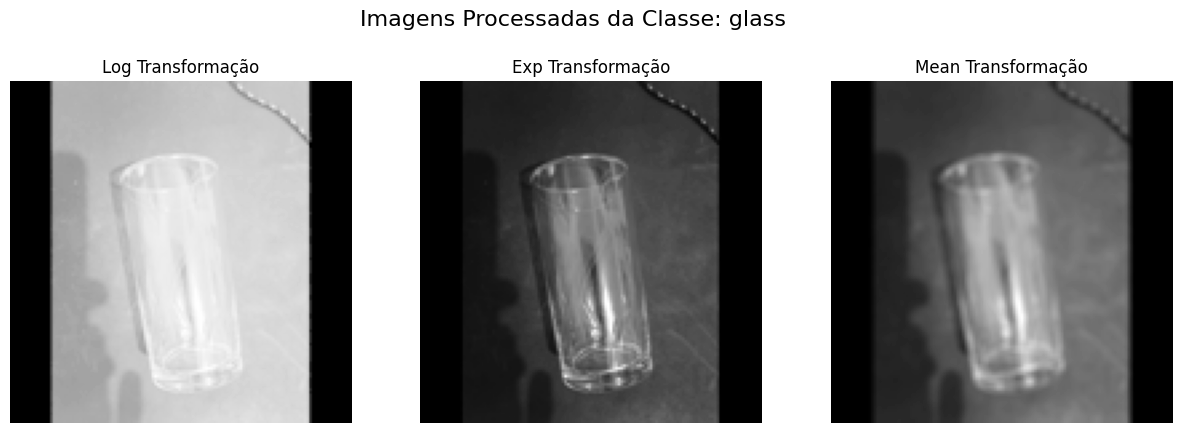

Classe: jar


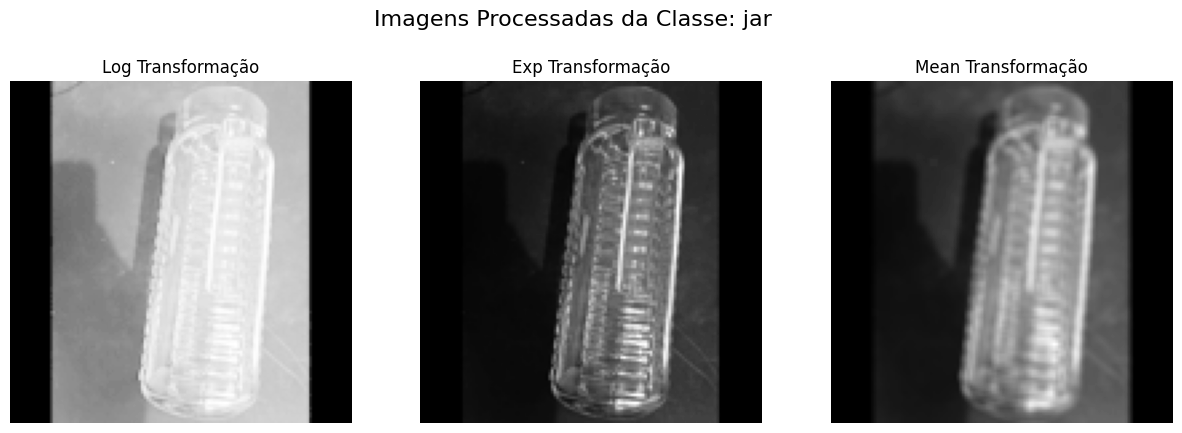

Classe: knife


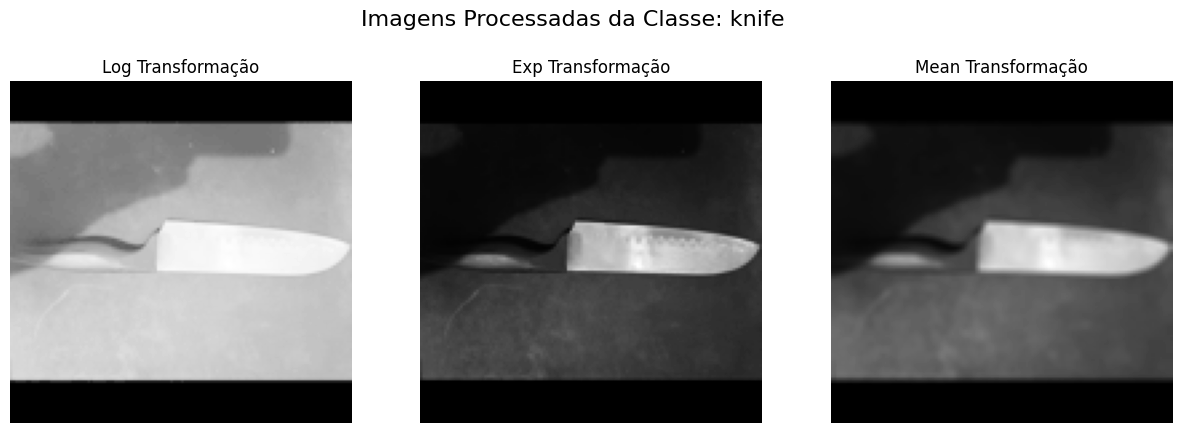

Classe: ladle


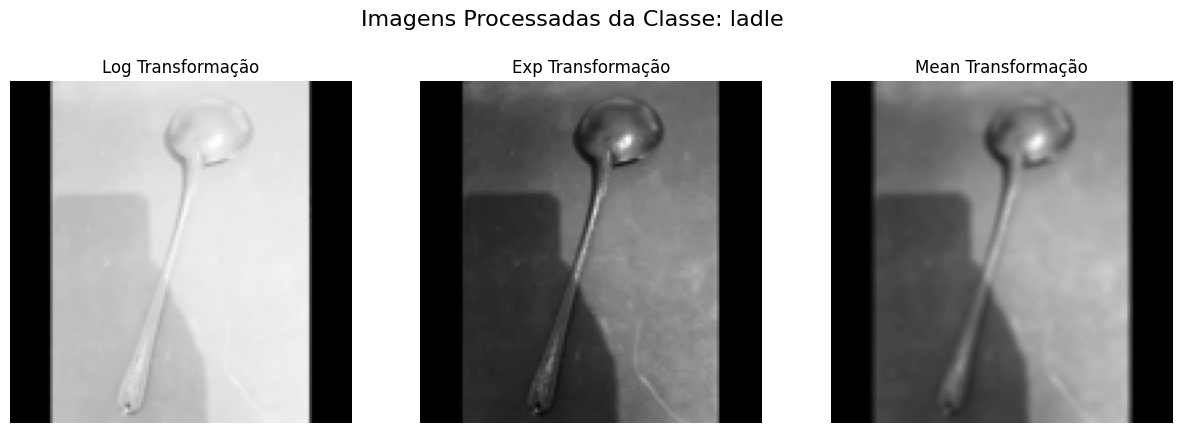

Classe: pasta_server


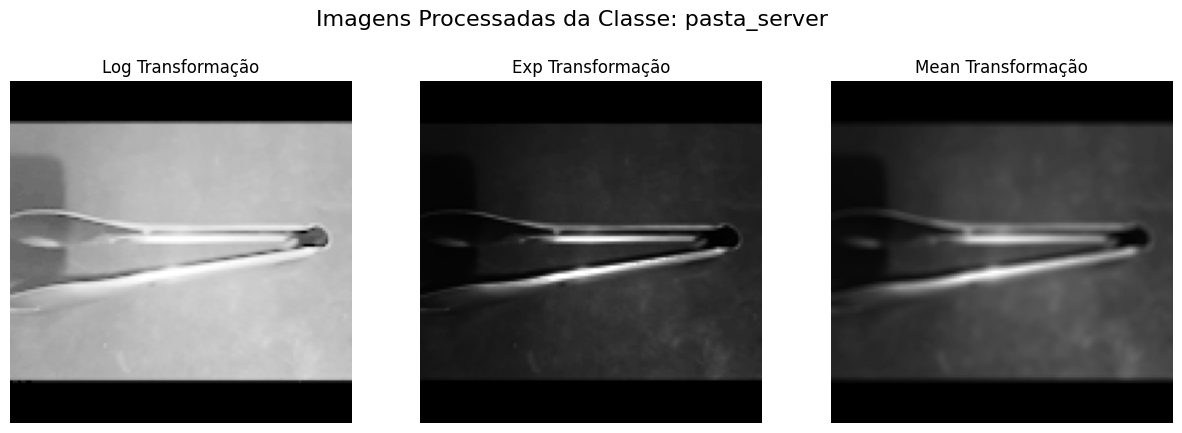

Classe: small_knife


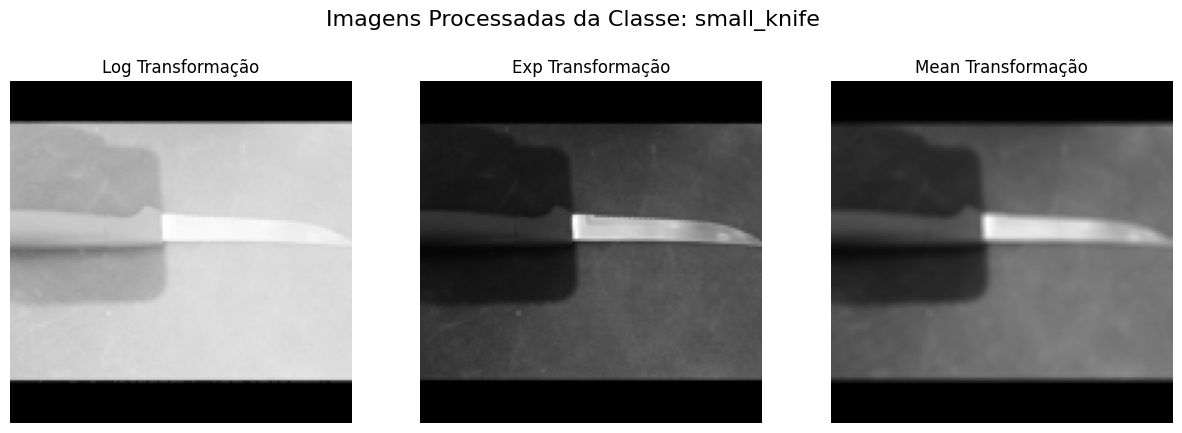

Classe: spoon


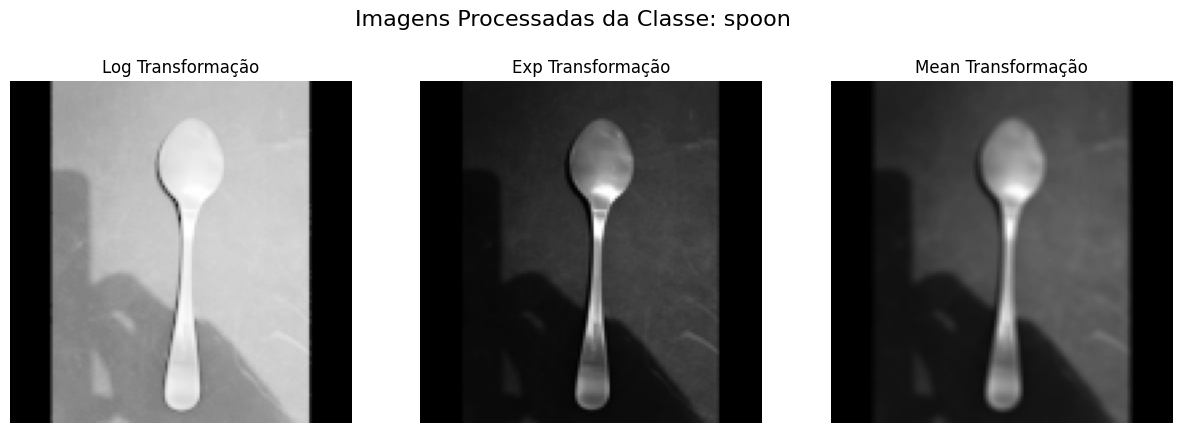

In [11]:
def show_processed_images(output_dir):
    """
    Exibe as imagens processadas (log, exp, mean) de cada classe, percorrendo as subpastas do diretório de saída.

    Args:
        output_dir (str): Diretório que contém as imagens processadas (log, exp, mean).
    """
    # Percorre todas as pastas e subpastas do diretório de saída
    for root, dirs, files in os.walk(output_dir):
        # Filtrar apenas as imagens processadas com sufixos '_log', '_exp', '_mean'
        processed_images = [f for f in files if f.lower().endswith(('.png')) and ('_log' in f or '_exp' in f or '_mean' in f)]
        
        # Se houver imagens processadas na pasta atual, exibi-las
        if processed_images:
            class_name = os.path.basename(root)  # Nome da classe
            print(f'Classe: {class_name}')
            
            # Configura um gráfico com 3 colunas (log, exp, mean)
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            fig.suptitle(f'Imagens Processadas da Classe: {class_name}', fontsize=16)
            
            # Verifica se existem imagens log, exp e mean para exibir
            for i, suffix in enumerate(['_log', '_exp', '_mean']):
                # Filtrar a imagem correspondente ao sufixo
                image_name = next((f for f in processed_images if suffix in f), None)
                
                if image_name:
                    img_path = os.path.join(root, image_name)
                    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Ler a imagem em escala de cinza
                    
                    # Exibir a imagem correspondente
                    axes[i].imshow(image, cmap='gray')
                    axes[i].set_title(suffix.replace('_', '').capitalize() + ' Transformação')
                    axes[i].axis('off')
            
            # Mostrar as imagens
            plt.show()

show_processed_images(transformed_images)

In [15]:

def show_augmented_images_by_class(base_dir):
    """
    Exibe as imagens aumentadas (que possuem 'aug' no nome) por classe, percorrendo todas as subpastas do diretório.

    Args:
        base_dir (str): Caminho para o diretório base que contém as subpastas com imagens.
    """
    # Percorre todas as pastas e subpastas do diretório base
    for root, dirs, files in os.walk(base_dir):
        augmented_images = [f for f in files if 'aug' in f.lower() and f.lower().endswith(('.png'))]
        
        if augmented_images:
            class_name = os.path.basename(root)
            fig, axes = plt.subplots(1, len(augmented_images), figsize=(15, 5))
            print(f'Classe: {class_name}')
            if len(augmented_images) == 1:
                axes = [axes]  # Para lidar com um único subplot

            for i, img_name in enumerate(augmented_images):
                img_path = os.path.join(root, img_name)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter de BGR para RGB (padrão de exibição do matplotlib)

                # Exibir a imagem
                axes[i].imshow(image)
                axes[i].axis('off')

            plt.show()

show_augmented_images_by_class(augmented_images)
